In [1]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt

import networkx as nx
from networkx import edge_betweenness_centrality as betweenness
from networkx.algorithms.community.centrality import girvan_newman

# import data
df = pd.read_csv('/home/ys/repo/pgm_project/edge_files/edge_mean_th95.csv')

In [2]:
# define edge_list (u,v)
edge_list = list(df.itertuples(index=False, name=None))

# define node_list
node_list = [x for x in range(max(df['dst']))]

In [3]:
# Create Graph 
G = nx.Graph()

# Add node and edge to graph
G.add_nodes_from(node_list)
G.add_edges_from(edge_list)

# Delete node which does not have neighborhood
print('Delete node with no neighborhood: {} \n'.format(list(nx.isolates(G))))
G.remove_nodes_from(list(nx.isolates(G)))
print('Number of node:',len(G.nodes))

Delete node with no neighborhood: [12, 14, 16, 18, 21, 24, 25, 27, 31, 44, 47, 49, 51, 52, 53, 57, 60, 61, 63, 64, 65, 71, 72, 73, 74, 77, 79, 80, 81, 84, 87, 88, 92, 93, 99, 101, 103, 104, 105, 107, 109, 112, 113, 116, 117, 124, 128, 131, 133, 138, 140] 

Number of node: 91


In [4]:
# criterion for most valuable edge (can be changed)
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    # print(centrality)
    return max(centrality, key=centrality.get)

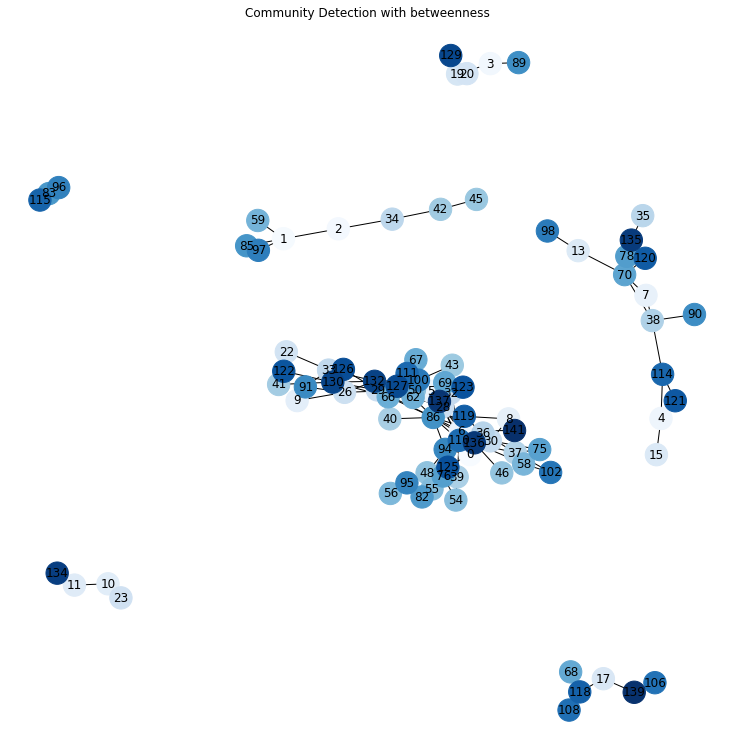

<Figure size 432x288 with 0 Axes>

In [5]:
# community detection with betweenness
communities = girvan_newman(G, most_valuable_edge=most_central_edge)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))


plt.figure(figsize=(10,10))
pos = nx.spring_layout(G, scale=4)
nx.draw(G, pos, node_color=range(len(G.nodes)), node_size=500, with_labels=True, cmap=plt.cm.Blues)
plt.title('Community Detection with betweenness')
plt.show()
plt.savefig('betweenness.jpg')